# slurm magics, Mnist using Tensorflow,horovod,mpi4py and cupy

```
We run the "mnist" example using a single and multiple GPUs.  Multigpu 
support is enabled by using Horovod and Mpi4py.

Finally we take an image and blur it using the GPU running Fourier 
transforms from the cupy package.  We progressively increase the blurring.
As the the bluring gets more intense we use the trained network to 
check if we still recognize the image.
```

## Load slurm commands


In [1]:
%load_ext slurm_magic

## Run a parallel version of mnist
```
This will use both GPUs with each GPU getting two tasks.

We send output to mnist.err and minst.out.  You can let
the output come back "here" but it is a bit messy.

Note we are running "srun" directly because it is a command
enabled by loading slurm_magic.

We can run this multiple times.  However, if we try to run
it after running the inline example below it will hang because
the inline run ties up the GPUs

```

#### Here is the output from nvidia-smi while this is running:
```

Thu Apr 22 09:57:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  Off  | 00000000:37:00.0 Off |                    0 |
| N/A   47C    P0    63W / 250W |   3754MiB / 16160MiB |     36%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  Off  | 00000000:86:00.0 Off |                    0 |
| N/A   45C    P0    83W / 250W |   3754MiB / 16160MiB |     38%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU   GI   CI        PID   Type   Process name                  GPU Memory |
|        ID   ID                                                   Usage      |
|=============================================================================|
|    0   N/A  N/A       997      C   python                           1875MiB |
|    0   N/A  N/A       999      C   python                           1875MiB |
|    1   N/A  N/A       998      C   python                           1875MiB |
|    1   N/A  N/A      1000      C   python                           1875MiB |
+-----------------------------------------------------------------------------+
```


In [2]:
srun -n 4 -e mnist.err -o minst.out /home/tkaiser2/newdriver/tensorflow2_mnist.py

''

In [3]:
cat mnist.err

2021-04-23 13:15:19.429012: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-04-23 13:15:19.429346: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-04-23 13:15:19.429343: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-04-23 13:15:19.429347: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-04-23 13:15:19.503545: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:37:00.0 name: Tesla V100-PCIE-16GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-04-23 13:15:19.503885: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:37:00.0 name: Tes

In [4]:
cat minst.out

1619205317.340108 Fri Apr 23 13:15:17 2021      0.000      0.000 start
hello from  1  of  4
gpus  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]  on  r104u33 mpi task  1  of  4
1619205319.821191 Fri Apr 23 13:15:19 2021      2.481      2.481 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
hvd.local_rank() 1
gpu=  1 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
gpu=  2 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')
gpus detected:  2
1619205363.503278 Fri Apr 23 13:16:03 2021     46.163     43.682 done
1619205317.340106 Fri Apr 23 13:15:17 2021      0.000      0.000 start
hello from  2  of  4
gpus  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]  on  r104u33 mpi task  2  of  4
1619205319.820843 Fri A

### Simpler example three different ways
```
Here we run the example from

[https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d]

three different ways.  We run it:
```
- From the command line
- Reading it in as a file and then running exec on the input
- As individual cells within the notebook


In [5]:
!./mnist1.py

SLURM_JOB_GPUS : 0,1
GPU_DEVICE_ORDINAL : 0,1
SLURM_GPUS_PER_NODE : 2
8
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
2021-04-23 13:16:09.069100: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-04-23 13:16:09.118785: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:37:00.0 name: Tesla V100-PCIE-16GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-04-23 13:16:09.119462: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:86:00.0 name: Tesla V100-PCIE-16GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-04-23 13:16:09.120336: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dy

#!/usr/bin/env python
#####!/home/tkaiser2/.conda-envs/dompt/bin/python

#https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
import os
for x in os.environ:
   #if x.find("SLURM") > -1 or x.find("gpu") > -1 :
   if x.find("GPU") > -1 or x.find("gpu") > -1 :
        print(x,":",os.environ[x])

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt
# Only use this if using iPython
try:
#%matplotlib inline
   pass
except:
    pass
# You may select anything up to 60,000
image_index = 7777 
# The label is 8
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')


x_train.shape



# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal poi

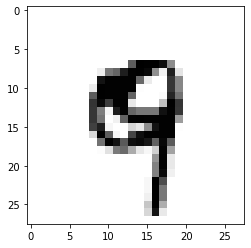

In [6]:
f=open("mnist1.py","r",newline="\n")
bonk=f.read()
for b in bonk.split("\n"):
    print(b)

exec(bonk)


In [7]:
#!/usr/bin/env python
#from:
#https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
import os
for x in os.environ:
   #if x.find("SLURM") > -1 or x.find("gpu") > -1 :
   if x.find("GPU") > -1 or x.find("gpu") > -1 :
        print(x,":",os.environ[x])

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

SLURM_JOB_GPUS : 0,1
GPU_DEVICE_ORDINAL : 0,1
SLURM_GPUS_PER_NODE : 2


8


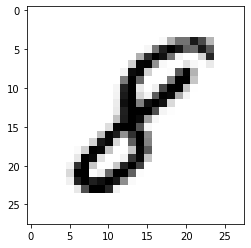

In [8]:
import matplotlib.pyplot as plt
# Only use this if using iPython
try:
#%matplotlib inline
   pass
except:
    pass
# You may select anything up to 60,000
image_index = 7777 
# The label is 8
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [11]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2090 - accuracy: 0.9370
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0857 - accuracy: 0.9731
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0592 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0448 - accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0350 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0315 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0245 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0224 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0184 - accuracy: 0.9935
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0618 

[0.06175895407795906, 0.984499990940094]

8


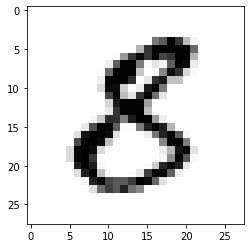

In [13]:
image_index = 1234
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [14]:
# get the cupy gpu package
import cupy as cp
import numpy as np
import time
import sys


In [15]:
# This is the blurring function.  It causes blurring
# by adding random phase variations in Fourier space.
# That is, this is a transfer function that preserves
# overall intensity.

# newimg= IFFT((FFT(image)*BLUR[p]))

from cmath import exp,pi
from random import random

def blur(p):
    return (exp(2*pi*1j*random()*p))

In [16]:
# Get an image
image_index=8888
istart=x_test[image_index].reshape(28, 28)
istart=cp.array(istart)

In [17]:
# Set our blur values
pvals=[0.0,0.01,0.02,0.04,0.08,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80]

In [18]:
# Convert it to Fourier space
# It is useful to have two copies
fspace=cp.fft.fft2(istart)
ospace=cp.fft.fft2(istart)

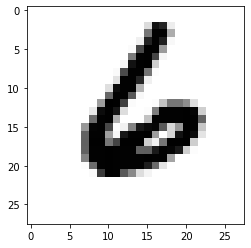

blur= 0.0  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


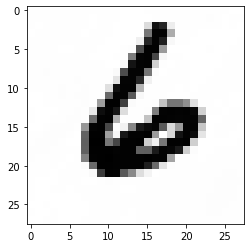

blur= 0.01  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


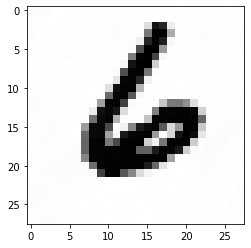

blur= 0.02  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


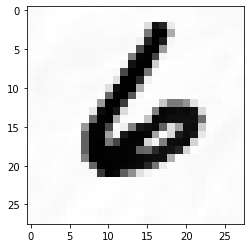

blur= 0.04  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


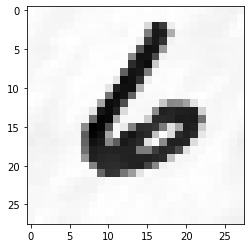

blur= 0.08  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


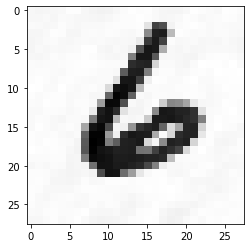

blur= 0.1  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


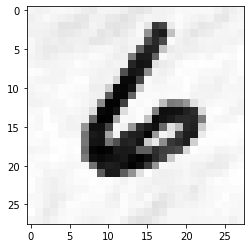

blur= 0.15  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


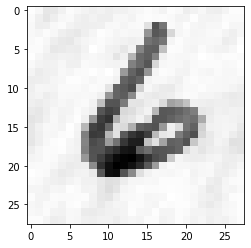

blur= 0.2  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


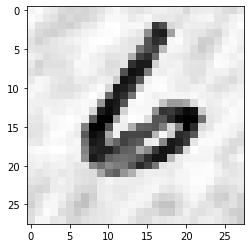

blur= 0.25  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


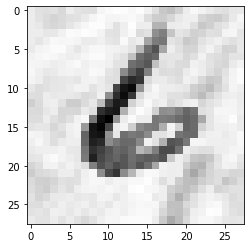

blur= 0.3  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


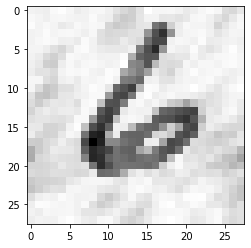

blur= 0.35  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


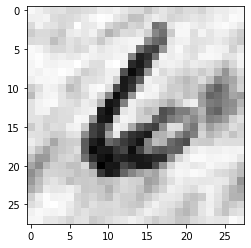

blur= 0.4  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


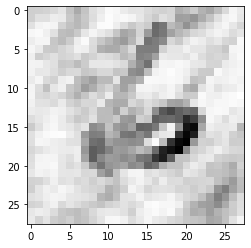

blur= 0.45  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


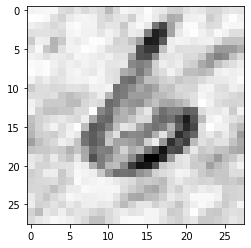

blur= 0.5  0.000 0.000 0.000 0.000 0.000 0.003 0.997 0.000 0.000 0.000 selected= 6


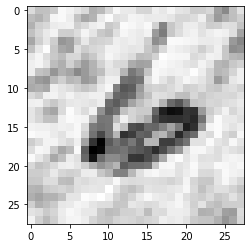

blur= 0.55  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


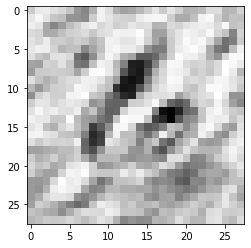

blur= 0.6  0.001 0.000 0.000 0.000 0.231 0.000 0.768 0.000 0.000 0.000 selected= 6


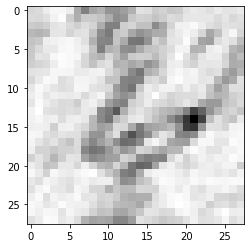

blur= 0.65  0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 selected= 6


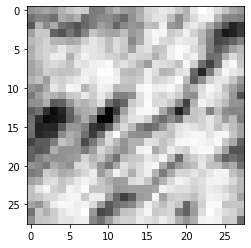

blur= 0.7  0.000 0.000 0.009 0.000 0.991 0.000 0.000 0.000 0.000 0.000 selected= 4


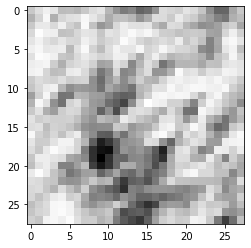

blur= 0.75  0.283 0.000 0.014 0.000 0.000 0.024 0.670 0.000 0.010 0.000 selected= 6


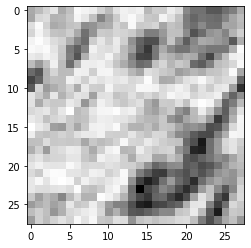

blur= 0.8  0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 selected= 5


In [19]:
for p in pvals:
    for nx in range(0,28):
        for ny in range(0,28):
            fspace[nx,ny]=ospace[nx,ny]*blur(p)
            newimg=cp.fft.ifft2(fspace)
            newimg=newimg.get()
            newimg=abs(newimg)
    plt.imshow(newimg,cmap='Greys')
    #plt.imshow(newimg)


    plt.show()
    pred = model.predict(newimg.reshape(1, 28, 28, 1))
    print("blur=",p,end=" ")
    digits=pred[0]
    for d in digits:
        print("%6.3f" % (d),end="")
    print(" selected=",pred.argmax())

### script to create the environment with old cuda and tensorflow
```
### Build a new version of python with and mpt  MPI version of mpi4py
CWD=`pwd`
export MYVERSION=apr21
cd ~
module load conda 2> /dev/null || echo "module load conda failed"
conda create --name $MYVERSION python=3.8 jupyter matplotlib scipy pandas xlwt dask -y

### Don't do conda init
### Just do source activate
source activate 
source activate $MYVERSION

which pip
which python

### Install mpi4py
#module load intel-mpi/2020.1.217  2> /dev/null || echo "module load mpi failed"
module load mpt  2> /dev/null || echo "module load mpi failed"
module load gcc/8.4.0  2> /dev/null || echo "module load gcc failed"
pip --no-cache-dir install mpi4py


### Install slurm magic commands 
pip install git+git://github.com/NERSC/slurm-magic.git


module use /projects/hpcapps/nvidia/cuda
ml gcc/7.4.0 10.0-7.6.5 cuda/10.0.130

pip --no-cache-dir install tensorflow==2.2.0
pip --no-cache-dir install tensorflow-gpu==2.2.0
pip --no-cache-dir install horovod[tensorflow]==0.20.0

pip --no-cache-dirinstall cupy 

```

### start the notebook
```
#!/bin/bash
#SBATCH --job-name="jupyter"
#SBATCH --nodes=1
#SBATCH --account=hpcapps
#SBATCH --time=01:00:00
##SBATCH --mail-type=ALL
##SBATCH --mail-user=tkaiser2@nrel.gov
#SBATCH --gpus-per-node=2 
#SBATCH --reservation=cuda_testing
##SBATCH --partition=debug


#export MYVERSION=dompt
#module load conda
#source activate
#source activate $MYVERSION

#module load mpt
#module load gcc/6.5.0 
#ml cuda/11.2
#ml cudnn/8.1.1/cuda-11.2 

module purge 
export MYVERSION=apr21
module load conda
source activate
source activate $MYVERSION

module use /projects/hpcapps/nvidia/cuda
ml mpt/2.23   gcc/7.4.0   10.0-7.6.5   cuda/10.0.130

export TF_XLA_FLAGS=--tf_xla_enable_xla_devices

date      > ~/jupyter.log
hostname >> ~/jupyter.log
jupyter notebook --NotebookApp.password='' --no-browser  >> ~/jupyter.log 2>&1

```

In [20]:
!date

Fri Apr 23 13:17:31 MDT 2021


### For the new drivers

```
el2:newdriver> cat newdriver
### Build a new version of python with and mpt  MPI version of mpi4py
CWD=`pwd`
export MYVERSION=apr22
cd ~
module load conda 2> /dev/null || echo "module load conda failed"
conda create --name $MYVERSION python=3.8 jupyter matplotlib scipy pandas xlwt dask -y

### Don't do conda init
### Just do source activate
source activate 
source activate $MYVERSION

which pip
which python

### Install mpi4py
#module load intel-mpi/2020.1.217  2> /dev/null || echo "module load mpi failed"
module load mpt  2> /dev/null || echo "module load mpi failed"
module load gcc/8.4.0  2> /dev/null || echo "module load gcc failed"
pip --no-cache-dir install mpi4py


### Install slurm magic commands 
pip install git+git://github.com/NERSC/slurm-magic.git



ml cuda/11.2
ml cudnn/8.1.1/cuda-11.2
#lrwxrwxrwx. 1 tkaiser2 tkaiser2       24 Apr 16 16:21 libcusolver.so.10 -> libcusolver.so.11.0.2.68
#lrwxrwxrwx. 1 tkaiser2 tkaiser2       56 Apr 16 16:20 libcusolver.so.11.0.2.68 -> /nopt/nrel/apps/cuda/11.2/lib64/libcusolver.so.11.0.2.68

# latest versions sould work with these drivers
pip --no-cache-dir install tensorflow
pip --no-cache-dir install tensorflow-gpu
pip --no-cache-dir install horovod[tensorflow]
el2:newdriver> 
el2:newdriver> 
el2:newdriver> cat dojup2x
#!/bin/bash
#SBATCH --job-name="jupyter"
#SBATCH --nodes=1
#SBATCH --account=hpcapps
#SBATCH --time=01:00:00
##SBATCH --mail-type=ALL
##SBATCH --mail-user=tkaiser2@nrel.gov
#SBATCH --gpus-per-node=2 
#SBATCH --reservation=cuda_testing
##SBATCH --partition=debug


export MYVERSION=apr22
module load conda
source activate
source activate $MYVERSION

module load mpt
module load gcc/6.5.0 
ml cuda/11.2
ml cudnn/8.1.1/cuda-11.2 
#export TF_XLA_FLAGS=--tf_xla_enable_xla_devices
export LD_LIBRARY_PATH=/projects/hpcapps/nvidia/hpc_sdk/Linux_x86_64/21.3/comm_libs/nccl/lib:$LD_LIBRARY_PATH
export LD_LIBRARY_PATH=/projects/hpcapps/nvidia/hpc_sdk/Linux_x86_64/21.3/math_libs/11.2/targets/x86_64-linux/lib:$LD_LIBRARY_PATH



date      > ~/jupyter.log
hostname >> ~/jupyter.log
jupyter notebook --NotebookApp.password='' --no-browser  >> ~/jupyter.log 2>&1


el2:newdriver> 
```

### Another way to start a notebook
- we run salloc to get a node
- ssh to our node
- run a script to set up our environment and start jupyter 

```

(/home/tkaiser2/.conda-envs/apr22) el3:newdriver> salloc  --x11 --account=hpcapps --time=1:00:00 --ntasks=8 --cpus-per-task=4 --nodes=1 --gres=gpu:2  --reservation=cuda_testing bash
salloc: Pending job allocation 6706234
salloc: job 6706234 queued and waiting for resources
salloc: job 6706234 has been allocated resources
salloc: Granted job allocation 6706234
el3:newdriver> sq
JOBID             TIME_LIMIT     TIME_LEFT      NODES START_TIME          PARTITION      REASON         SUBMIT_TIME         NODELIST
6706234           1:00:00        59:47          1     2021-04-22T11:55:02 gpu            None           2021-04-22T11:54:56 r103u15
el3:newdriver> ssh r103u15
Last login: Thu Apr 22 10:44:28 2021 from el2.ib0.cm.hpc.nrel.gov
r103u15:~> cd newdriver/
r103u15:newdriver> . dojup2x

```